In [1]:
import numpy as np
import utils.exampleFunctions as ex_func 
import utils.generalDefinitions as gen_def
import utils.models as models
import utils.samplers as samplers
import matplotlib.pyplot as plt
import pandas as pd


Working on function: Ackley
Iterations to reach the given result: 19
0.8568364083352726
******
******
Working on function: Bukin
Iterations to reach the given result: 21
0.9669727821446232
******
******
Working on function: Cross in Tray
Iterations to reach the given result: 19
0.922189236124468
******
******
Working on function: Drop Wave
Iterations to reach the given result: 20
0.94539915728099
******
******
Working on function: Eggholder
Iterations to reach the given result: 1
0.7171443102541164
******
******
Working on function: Gramacy Lee
Iterations to reach the given result: 23
0.8941079948725694
******
******
Working on function: Holder Table
Iterations to reach the given result: 13
0.9911108764159641
******
******
Working on function: Schaffer2
Iterations to reach the given result: 13
0.7409920361245261
******
******
Working on function: Schaffer4
Iterations to reach the given result: 21
0.8789496989185019
******
******
Working on function: Schwefel
Iterations to reach the giv

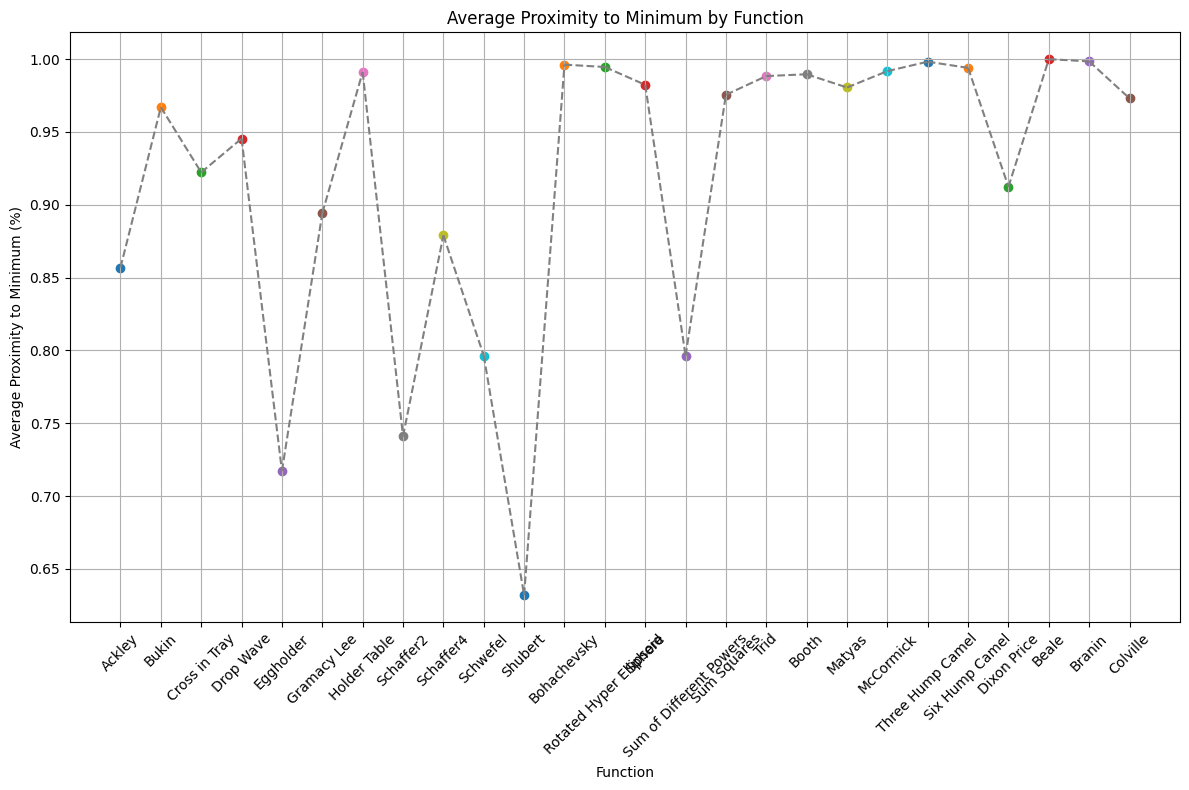

In [2]:
#25 Iterations
# Initial LHS, Candidate LHS
function_names = ex_func.function_ranges.keys()

# Her bir fonksiyon için işlemleri gerçekleştir
number_of_repeats = 1

average_proximities = {
    "Function": [],
    "Average Proximity to Minimum (%)": []
}

for function_name in function_names:
    if True:
    
        proximity_to_minimum_count = 0
        for i in range(number_of_repeats):
            iteration_count = 0
            if True:
                    
                try:
                    print(f"Working on function: {function_name}")

                    function_param = getattr(ex_func, function_name.lower().replace(" ", "_"))

                    # Aralığı al
                    range_param = ex_func.function_ranges[function_name]


                    # Generate initial samples
                    sampler = samplers.LatinHypercubeSampling(function_param)
                    initial_points = sampler.sample(num_samples=5, ranges=range_param)
                    initial_values = np.array([function_param(i) for i in initial_points])

                    # Train the initial model using random forests
                    rf_model = models.RandomForestModel(n_estimators=200, random_state=1729)
                    rf_model.train_model(initial_points, initial_values)
                    trained_rf_model = rf_model.get_model()

                    # Perform active learning
                    active_learning = models.ActiveLearning(initial_points, initial_values, rf_model, sampler)
                    min_function_values, improvement, new_points_all, iteration, current_min_iter = active_learning.run_active_learning_constant_iterations_25(2000, range_param, 3)
                    iteration_count += iteration
                    minimum_value_so_far = min(min_function_values)
                    
                    current_proximity =  minimum_value_so_far 
                    proximity_to_minimum_count += current_proximity

                    print(f"Iterations to reach the given result: {current_min_iter}")
                    #print(proximity_to_minimum_count)

                    

                    #print(f"Actual global min value is: {ex_func.function_mins[function_name]}")
                
                    
                
                except Exception as e:
                    print(f"{function_name} function failed.")
                    print(e)

               
        if True:
            average_iterations = iteration_count/number_of_repeats
            current_average_func = ex_func.function_averages[function_name][0]
            current_minimum_func = ex_func.function_mins[function_name][0]
            average_proximity_to_minimum = proximity_to_minimum_count/number_of_repeats
            

            average_proximity_to_minimum_by_percent = (2*(current_average_func-current_minimum_func)-(average_proximity_to_minimum-current_minimum_func))/(2*(current_average_func-current_minimum_func))
            average_proximities["Function"].append(function_name)
            average_proximities["Average Proximity to Minimum (%)"].append(average_proximity_to_minimum_by_percent)
            #print(average_iterations)
            print(average_proximity_to_minimum_by_percent)

            print("******")
            print("******")
            

# Convert the dictionary to a DataFrame
average_proximities_df = pd.DataFrame(average_proximities)

# Plotting
plt.figure(figsize=(12, 8))
for i, (function, proximity) in enumerate(zip(average_proximities_df["Function"], average_proximities_df["Average Proximity to Minimum (%)"])):
    plt.scatter(i, proximity, label=function)

# Connect points with lines
for i in range(len(average_proximities_df["Function"]) - 1):
    plt.plot([i, i + 1], [average_proximities_df["Average Proximity to Minimum (%)"][i], average_proximities_df["Average Proximity to Minimum (%)"][i + 1]], color='gray', linestyle='--')

# Add labels and legend
plt.xlabel("Function")
plt.ylabel("Average Proximity to Minimum (%)")
plt.title("Average Proximity to Minimum by Function")
plt.xticks(range(len(average_proximities_df["Function"])), average_proximities_df["Function"], rotation=45)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()
